In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily  as ctx
import seaborn as sns
import numpy as np

In [7]:

prov=pd.read_csv("C:/Users/USUARIO/Desktop/Opinion Publica Python/CENSO/prov.csv")
hogar=pd.read_csv("C:/Users/USUARIO/Desktop/Opinion Publica Python/CENSO/hogar.csv")
persona=pd.read_csv("C:/Users/USUARIO/Desktop/Opinion Publica Python/CENSO/persona.csv")
vivienda=pd.read_csv("C:/Users/USUARIO/Desktop/Opinion Publica Python/CENSO/vivienda.csv")


In [8]:
#De vivienda
#Edad (P03): cantidad de años cumplidos a la fecha de referencia del Censo. 
#Filtro 6 a 12
#Asiste o asistió a un establecimiento educativo (P08): 
#Filtro de los 6 a 12 los 2 y 3(respectivamente asistio, nunca asistio)

nuevo = persona[persona['P03'].between(6, 12)]
nuevo = nuevo[nuevo['P08'].between(2, 3)]

#Miro los hogar unicos (Puede que algun hogar tenga mas de un niñx sin escolarizar)
hogares_niñxs_sin_escolarizar = nuevo['HOGAR_REF_ID'].nunique()
hogares_niñxs_sin_escolarizar

1659

In [9]:
#Algun NBI - H10  No tener baño
sin_baño = len(hogar[hogar['H10']==0].value_counts())
sin_baño

2465

In [10]:
#AlgunNBI - Hacinamiento

#Se considera hacinamiento un valor de 6

hacinamiento = len(hogar[hogar['INDHAC']==6].value_counts())
hacinamiento

17639

In [11]:
#(1085463, 13)
vivienda=pd.read_csv("C:/Users/USUARIO/Desktop/Opinion Publica Python/CENSO/vivienda.csv")


#VO1 - Vivienda de tipo inconveniente. Se excluye a las viviendas tipo casa, departamento y rancho.
vivienda_inconveniente = len(vivienda[vivienda['V01']>=5].value_counts()) + len(vivienda[vivienda['V01']==3].value_counts())
vivienda_inconveniente

41469

In [14]:
#nbi. los cuales el jefe de hogar tiene bajo nivel de educación (dos años o menos en el nivel primario
#Jefe_bajo_nivel_educativo
persona=pd.read_csv("C:/Users/USUARIO/Desktop/Opinion Publica Python/CENSO/persona.csv")
ocupados = persona[persona['CONDACT']==1]
#upados_bajo_educativo= ocupados[ocupados['P09']==2 and ocupados[ocupados['P09']==1]


z =ocupados[ocupados['P09'].between(1, 2)]
j= z[z['P10']==2]

j= j[['PERSONA_REF_ID','HOGAR_REF_ID','P09', 'P10', 'CONDACT']]



#Sumo los ocupados por hogar 
d= j.groupby(('HOGAR_REF_ID')).CONDACT.sum()
d = d.to_frame()

e = persona.groupby(('HOGAR_REF_ID')).PERSONA_REF_ID.count()
e = e.to_frame()

f = d.merge(e, how='inner', on='HOGAR_REF_ID')

f['Personas por ocupados por hogar'] = f["PERSONA_REF_ID"]/f['CONDACT']





Jefe_bajo_nivel_educativo= len(f[f['Personas por ocupados por hogar']>=4].value_counts()) 
Jefe_bajo_nivel_educativo

38

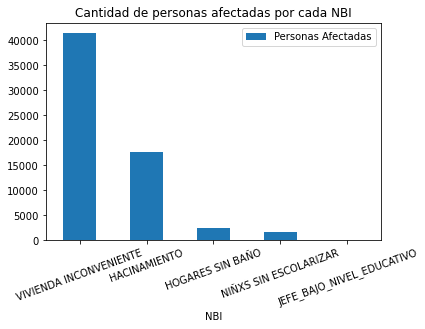

In [40]:
data = {"NBI":["VIVIENDA INCONVENIENTE", "HACINAMIENTO","HOGARES SIN BAÑO", "NIÑXS SIN ESCOLARIZAR","JEFE_BAJO_NIVEL_EDUCATIVO" ],

        "Personas Afectadas":[41469,17639,2465,1659,38]}
dataFrame = pd.DataFrame(data=data)



dataFrame.plot.bar(x="NBI", y="Personas Afectadas", rot=20, title="Cantidad de personas afectadas por cada NBI")





